In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

In [7]:
print((df.Cabin.isnull().sum()/len(df))*100)

77.10437710437711


Almost 80% of Cabin data is missing.

In [8]:
print((df.Age.isnull().sum()/len(df))*100)

19.865319865319865


Almost 20% of Age data is missing.

In [9]:
survivors=df.Survived.sum()
unsurvivors=len(df)-survivors
print( survivors, 'people survived.')
print( unsurvivors, 'people did not survive.')


342 people survived.
549 people did not survive.


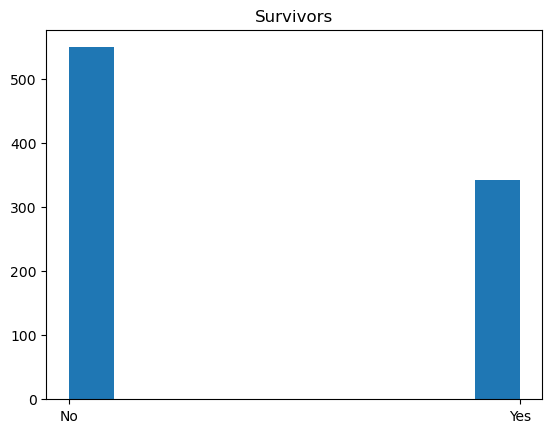

In [10]:
plt.hist(df.Survived)
plt.title("Survivors")
plt.xticks(np.arange(2),("No","Yes"))
plt.show()

In [11]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

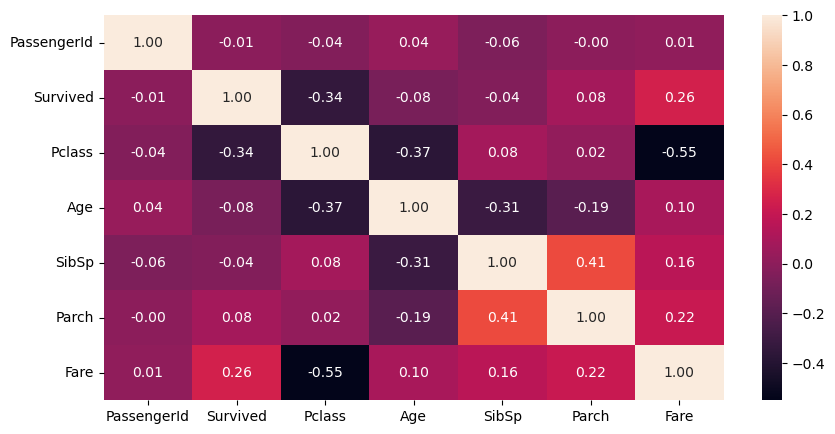

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

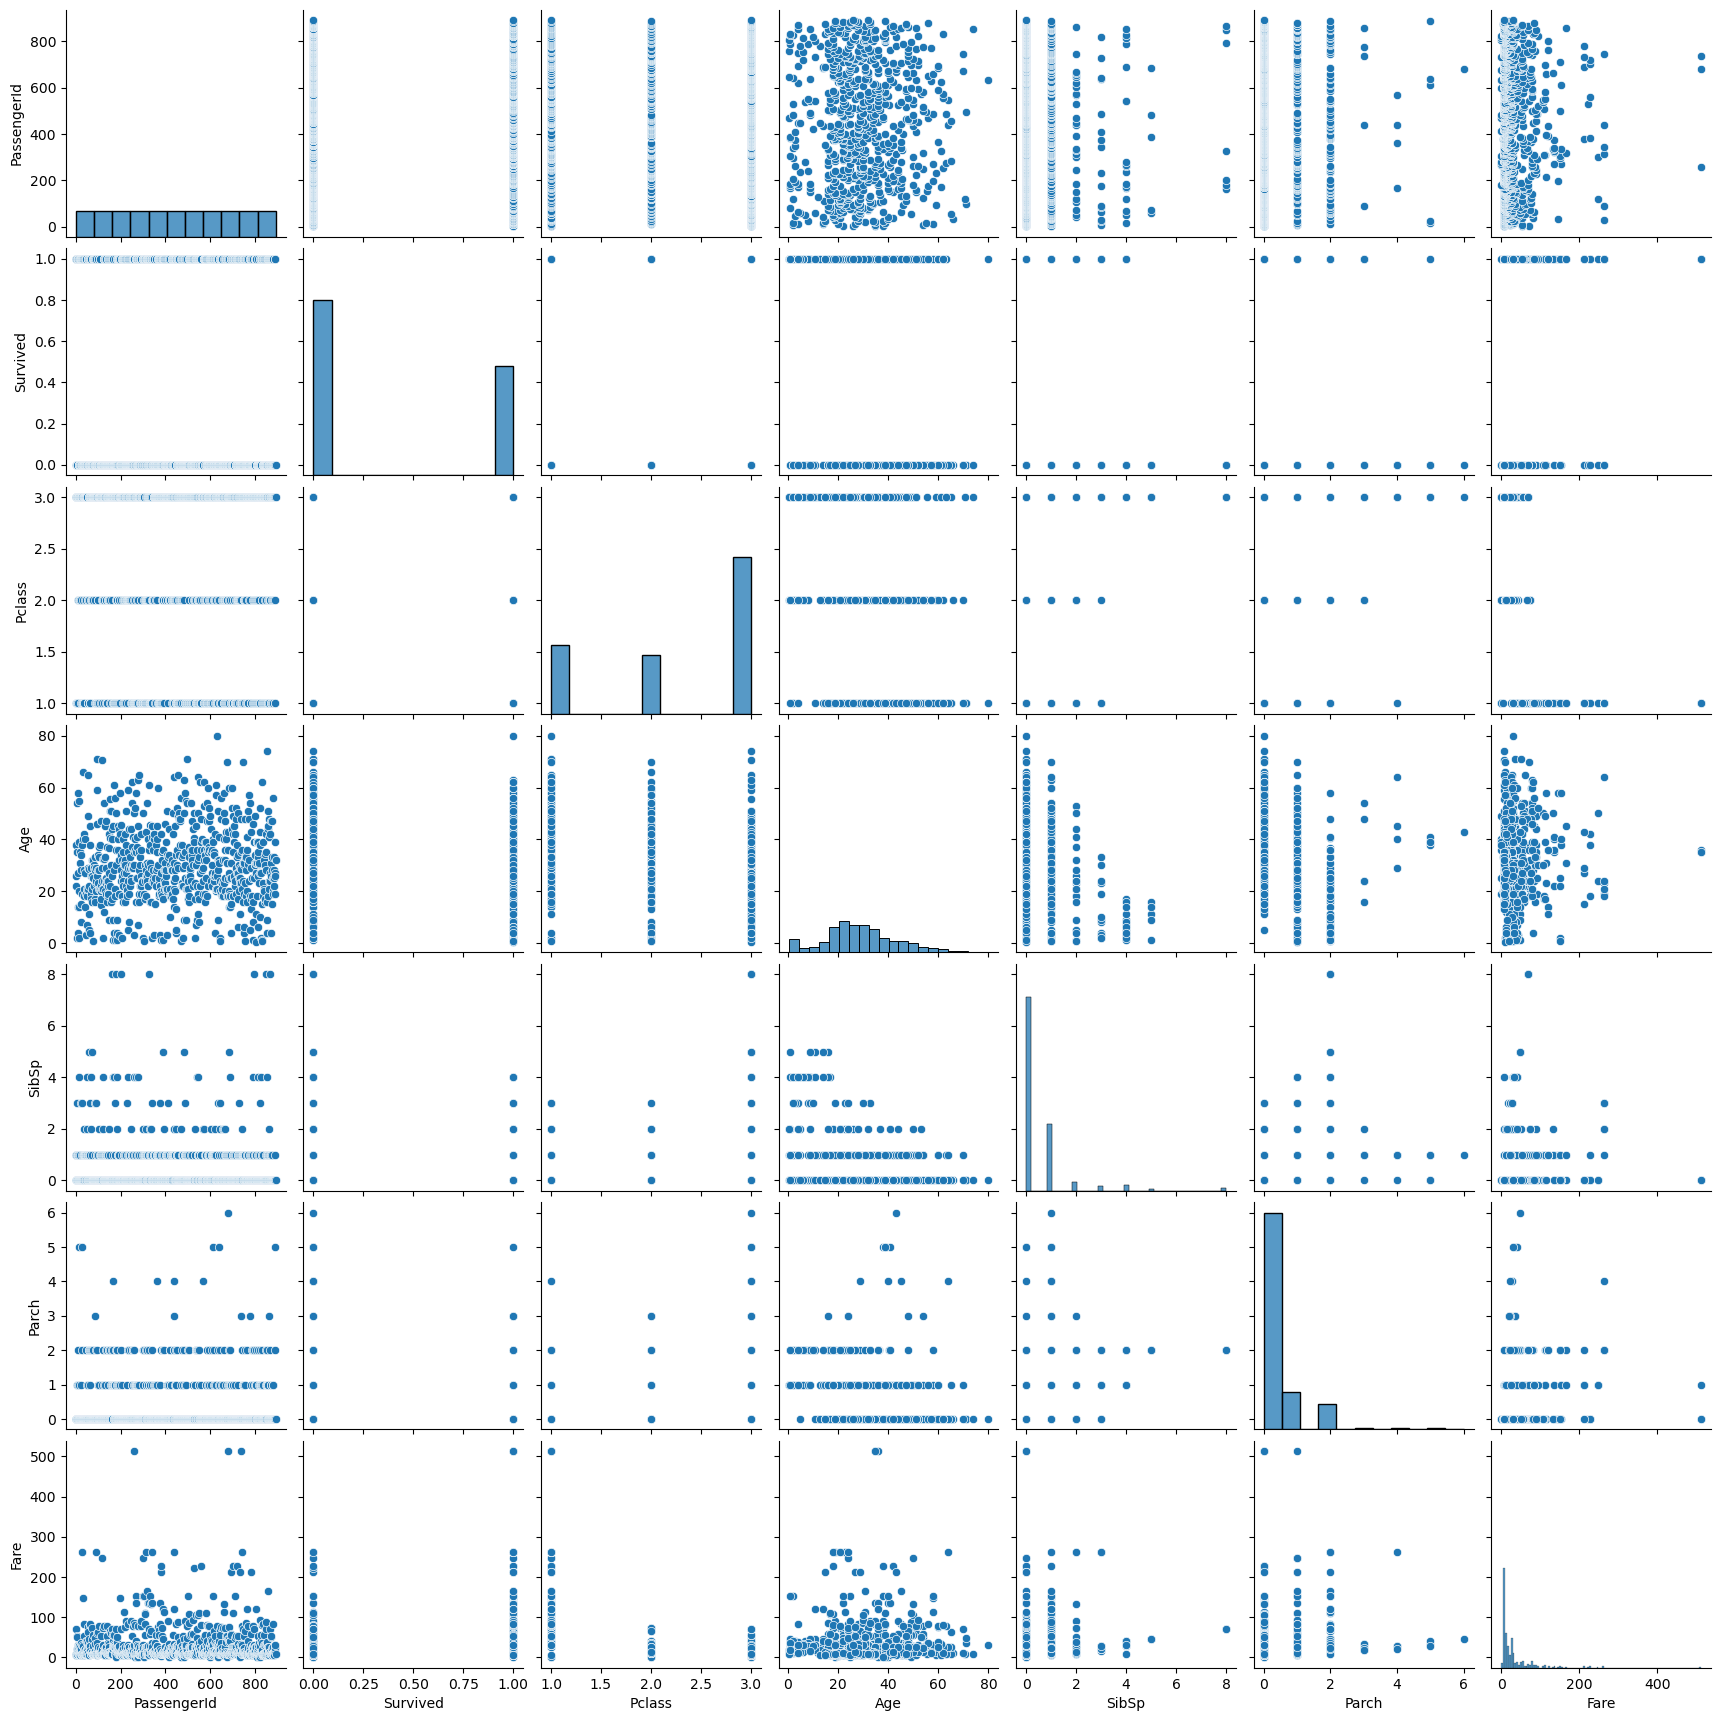

In [18]:
sns.pairplot(df)

In [19]:
df.Age.fillna(df['Age'].median(),inplace=True)


<AxesSubplot:xlabel='Age', ylabel='Density'>

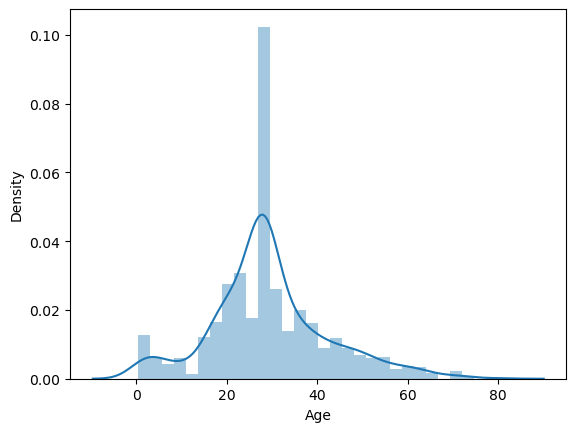

In [20]:
sns.distplot(df.Age)

In [21]:
df['Age'].isnull().sum()

0

In [22]:
def bar_chart(feature):
    survived=df[df['Survived']==1][feature].value_counts()
    dead=df[df['Survived']==0][feature].value_counts()
    new=pd.DataFrame([survived,dead])
    new.index=['Survived','Dead']
    new.plot(kind='bar',stacked=True,figsize=(10,5))
    

Survived :
 female    233
male      109
Name: Sex, dtype: int64
dead:
 male      468
female     81
Name: Sex, dtype: int64


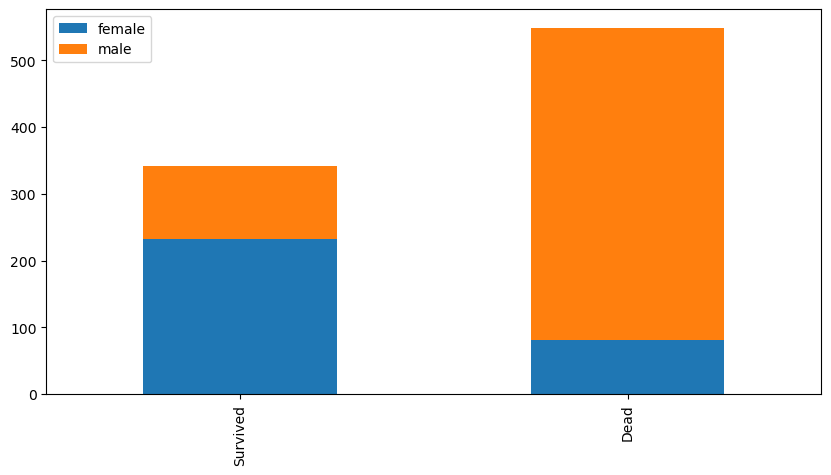

In [23]:
bar_chart('Sex')
print("Survived :\n",df[df['Survived']==1]['Sex'].value_counts())
print("dead:\n",df[df['Survived']==0]['Sex'].value_counts())

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


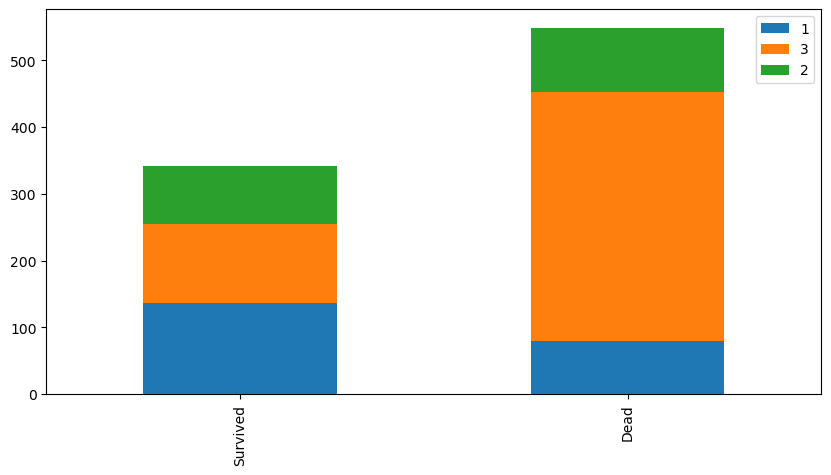

In [24]:
bar_chart('Pclass')
print("Survived :\n",df[df['Survived']==1]['Pclass'].value_counts())
print("dead:\n",df[df['Survived']==0]['Pclass'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


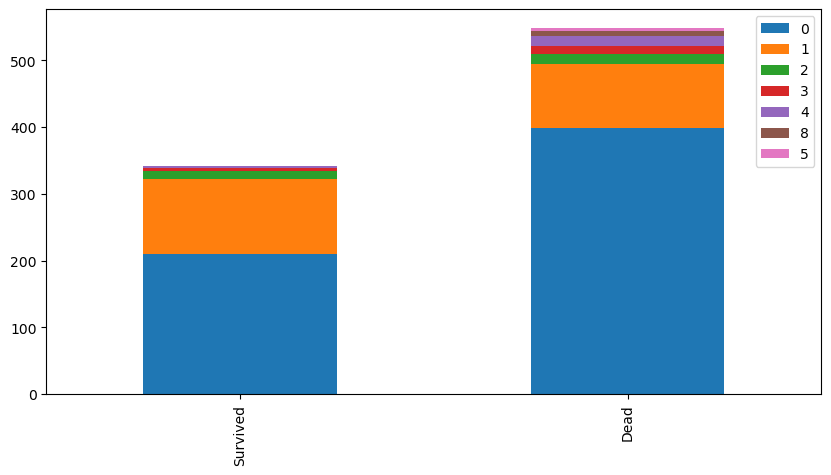

In [25]:
bar_chart('SibSp')
print("Survived :\n",df[df['Survived']==1]['SibSp'].value_counts())
print("dead:\n",df[df['Survived']==0]['SibSp'].value_counts())

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


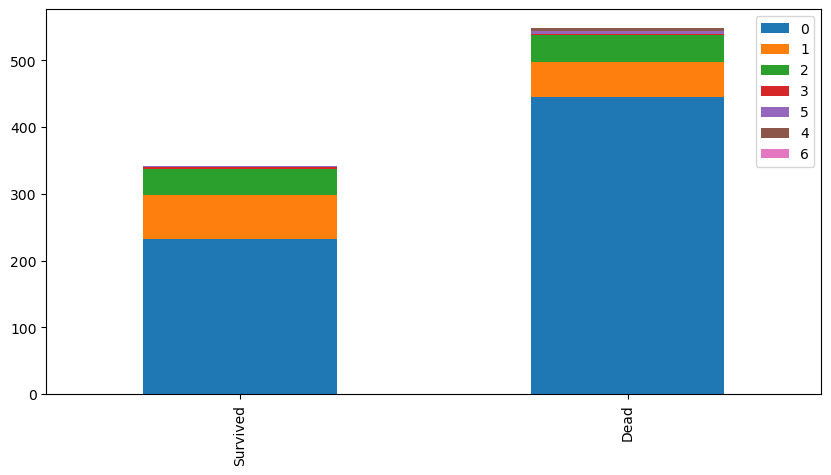

In [26]:
bar_chart('Parch')
print("Survived :\n",df[df['Survived']==1]['Parch'].value_counts())
print("dead:\n",df[df['Survived']==0]['Parch'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


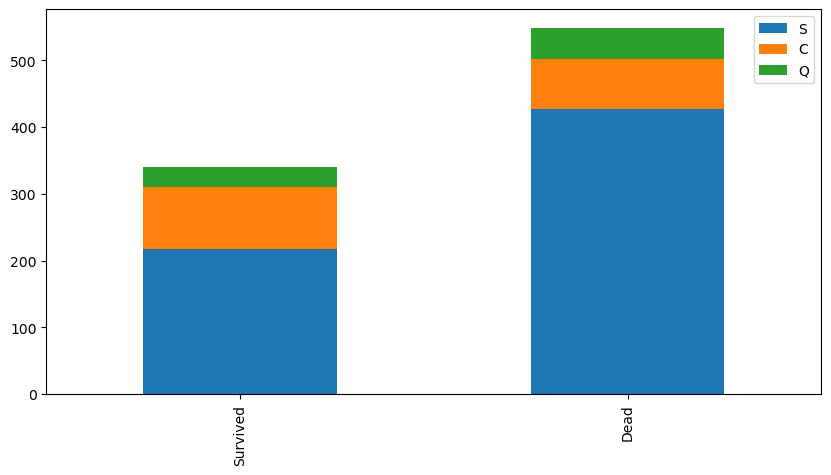

In [27]:
bar_chart('Embarked')
print("Survived :\n",df[df['Survived']==1]['Embarked'].value_counts())
print("dead:\n",df[df['Survived']==0]['Embarked'].value_counts())

In [28]:
list_feature=df.columns
print("There are ",len(list_feature)," features in the dataset")
for f in list_feature:
    print("Feature",f,"|| type", type(df[f][0]), "|| Example", df[f][0], "|| Number on unique vale", len(df[f].unique()))

There are  12  features in the dataset
Feature PassengerId || type <class 'numpy.int64'> || Example 1 || Number on unique vale 891
Feature Survived || type <class 'numpy.int64'> || Example 0 || Number on unique vale 2
Feature Pclass || type <class 'numpy.int64'> || Example 3 || Number on unique vale 3
Feature Name || type <class 'str'> || Example Braund, Mr. Owen Harris || Number on unique vale 891
Feature Sex || type <class 'str'> || Example male || Number on unique vale 2
Feature Age || type <class 'numpy.float64'> || Example 22.0 || Number on unique vale 88
Feature SibSp || type <class 'numpy.int64'> || Example 1 || Number on unique vale 7
Feature Parch || type <class 'numpy.int64'> || Example 0 || Number on unique vale 7
Feature Ticket || type <class 'str'> || Example A/5 21171 || Number on unique vale 681
Feature Fare || type <class 'numpy.float64'> || Example 7.25 || Number on unique vale 248
Feature Cabin || type <class 'float'> || Example nan || Number on unique vale 148
Featur

In [29]:
df[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [30]:
df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
df[['Embarked', 'Pclass']].groupby('Embarked').mean().sort_values(by='Pclass', ascending=False)

,Pclass
Embarked,
Q,2.909091
S,2.350932
C,1.886905


In [32]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [33]:
df[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


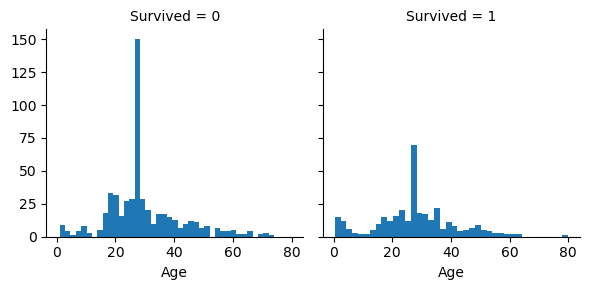

In [34]:
num=sns.FacetGrid(df, col="Survived")
print(num.map(plt.hist,'Age', bins=40))

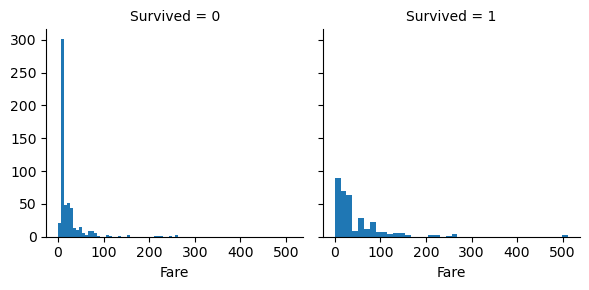

In [35]:
num=sns.FacetGrid(df, col="Survived")
print(num.map(plt.hist,'Fare', bins=40))

In [36]:
df.drop('PassengerId', axis = 1, inplace = True)

In [37]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
def get_title(var):
    title=var.split(',')[1]
    title2=title.split('.')[0]
    return title2[1:]

In [39]:
df['Title']=df.apply(lambda x: get_title(x.Name),axis=1)

In [40]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [41]:
print(df.groupby('Title').count().sort_values(by='Survived', ascending=False)['Pclass'])
print('-------------')


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Pclass, dtype: int64
-------------


In [42]:
title_map = {'Mlle':'Miss','Ms':'Miss','Mlle':'Miss', 
             'Mme':'Mrs', 
             'Dr':'Other','Rev':'Other', 'Major':'Other', 'Col':'Other', 'Sir':'Other', 'Dona':'Other',
             'Capt':'Other', 'Lady':'Other','Jonkheer':'Other', 'Don':'Other', 'the Countess':'Other',
            'Mr':'Mr',
            'Miss':'Miss',
            'Mrs':'Mrs',
            'Master':'Master'}

df['Title'] = df['Title'].map(title_map)

In [43]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [44]:
df.drop('Name', axis=1, inplace = True)

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Other
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [46]:
df[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Other,0.347826
Mr,0.156673


In [47]:
sex_maping={'male':0,'female':1}
df['Sex']=df['Sex'].map(sex_maping)

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Other
887,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,1,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr


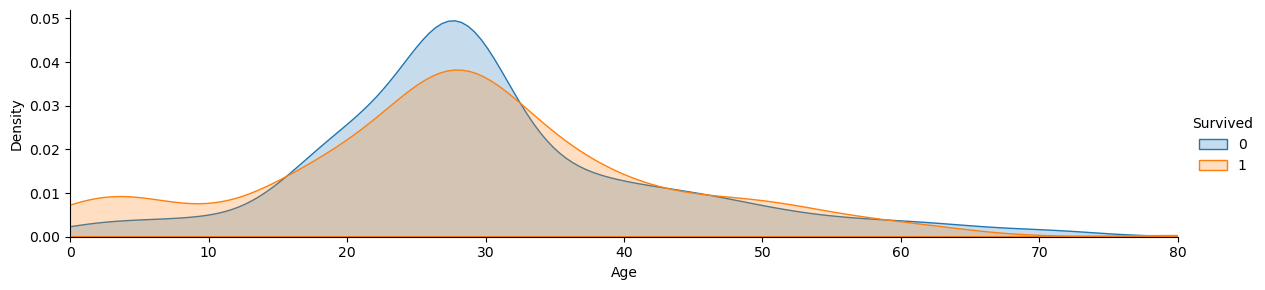

In [49]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.show()

(10.0, 50.0)

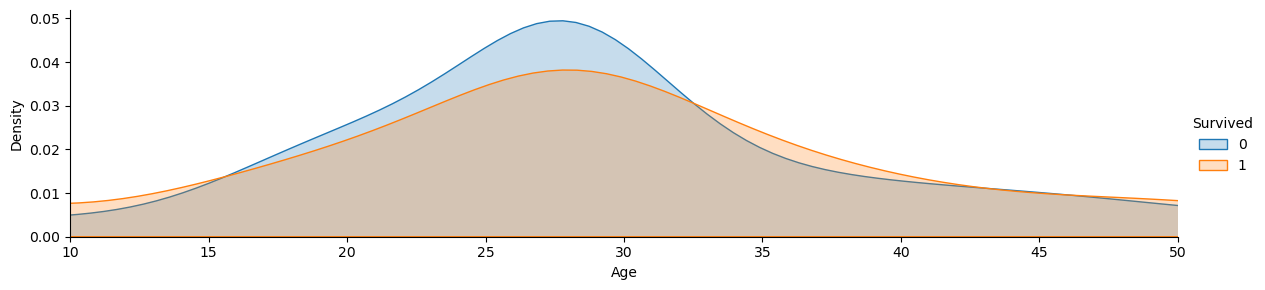

In [50]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

In [51]:
def get_family_size(Parch,SibSp):
    
    return Parch+SibSp+1

In [52]:
df["Familysize"]=df.apply(lambda x: get_family_size(x.Parch,x.SibSp),axis=1)

In [53]:
df[['Familysize', 'Survived']].groupby('Familysize').mean().sort_values(by='Survived', ascending=False)

,Survived
Familysize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [54]:
def get_family_type(var):
    
    if var == 1:
        return 'alone'
    elif var <= 4:
        return 'small'
    else:
        return 'big'

In [55]:
df['Familytype']=df.apply(lambda x : get_family_type(x.Familysize),axis=1)

In [56]:
df.drop(['Familysize','Parch','SibSp'],axis=1,inplace=True)

In [57]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Familytype
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,Mr,small
1,1,1,1,38.0,PC 17599,71.2833,C85,C,Mrs,small
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,alone
3,1,1,1,35.0,113803,53.1000,C123,S,Mrs,small
4,0,3,0,35.0,373450,8.0500,NaN,S,Mr,alone
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,211536,13.0000,NaN,S,Other,alone
887,1,1,1,19.0,112053,30.0000,B42,S,Miss,alone
888,0,3,1,28.0,W./C. 6607,23.4500,NaN,S,Miss,small
889,1,1,0,26.0,111369,30.0000,C148,C,Mr,alone


In [58]:
df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [59]:
embarked_mapping = {'S':0,'C':1,'Q':2}
df['Embarked']=df["Embarked"].map(embarked_mapping)

In [60]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Familytype
0,0,3,0,22.0,A/5 21171,7.2500,NaN,0.0,Mr,small
1,1,1,1,38.0,PC 17599,71.2833,C85,1.0,Mrs,small
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,alone
3,1,1,1,35.0,113803,53.1000,C123,0.0,Mrs,small
4,0,3,0,35.0,373450,8.0500,NaN,0.0,Mr,alone
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,211536,13.0000,NaN,0.0,Other,alone
887,1,1,1,19.0,112053,30.0000,B42,0.0,Miss,alone
888,0,3,1,28.0,W./C. 6607,23.4500,NaN,0.0,Miss,small
889,1,1,0,26.0,111369,30.0000,C148,1.0,Mr,alone


In [61]:
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [62]:
df['Fare'].isnull().sum()

0

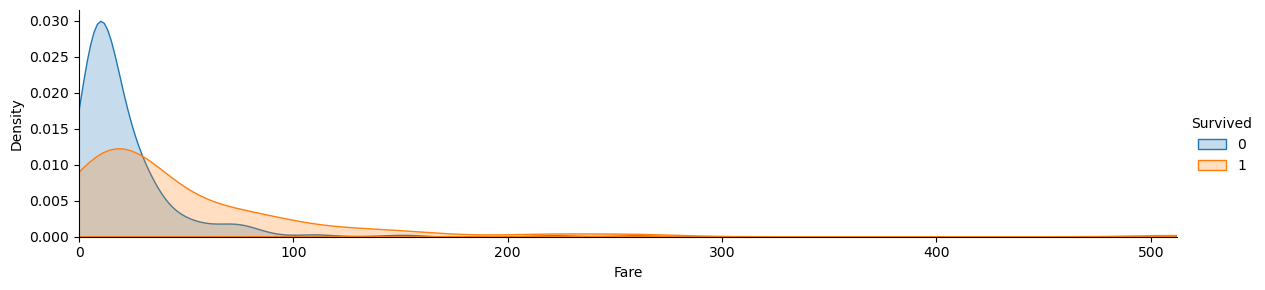

In [63]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, df['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 40.0)

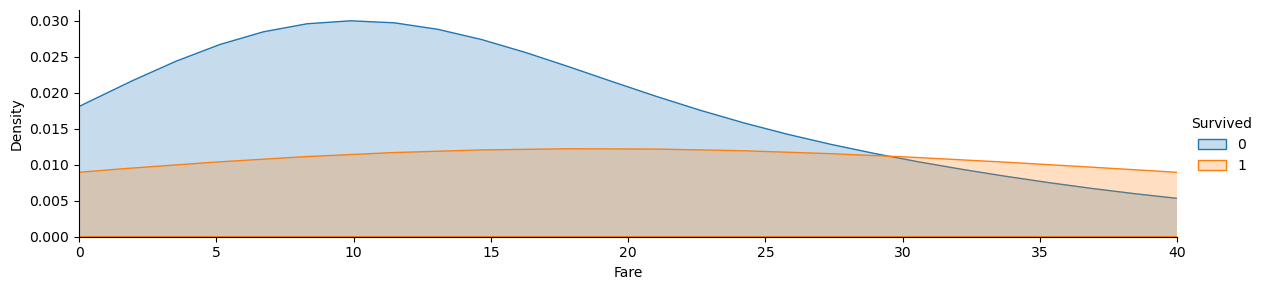

In [64]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 40)

In [65]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [66]:
df['Cabin']=df['Cabin'].str[:1]

In [67]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Familytype
0,0,3,0,22.0,A/5 21171,7.2500,NaN,0.0,Mr,small
1,1,1,1,38.0,PC 17599,71.2833,C,1.0,Mrs,small
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,alone
3,1,1,1,35.0,113803,53.1000,C,0.0,Mrs,small
4,0,3,0,35.0,373450,8.0500,NaN,0.0,Mr,alone
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,211536,13.0000,NaN,0.0,Other,alone
887,1,1,1,19.0,112053,30.0000,B,0.0,Miss,alone
888,0,3,1,28.0,W./C. 6607,23.4500,NaN,0.0,Miss,small
889,1,1,0,26.0,111369,30.0000,C,1.0,Mr,alone


<AxesSubplot:>

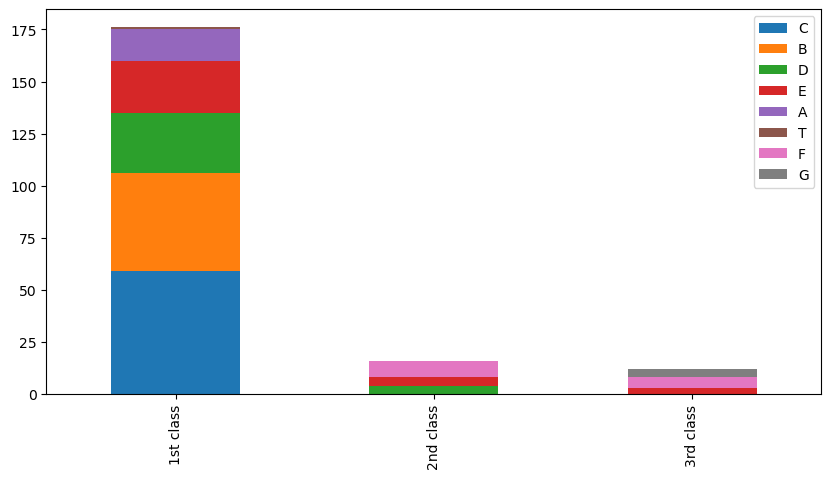

In [68]:
Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
new = pd.DataFrame([Pclass1, Pclass2, Pclass3])
new.index = ['1st class','2nd class', '3rd class']
new.plot(kind='bar',stacked=True, figsize=(10,5))

In [69]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
df['Cabin'] = df["Cabin"].map(cabin_mapping)

In [70]:
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [71]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Familytype
0,0,3,0,22.0,A/5 21171,7.2500,2.0,0.0,Mr,small
1,1,1,1,38.0,PC 17599,71.2833,0.8,1.0,Mrs,small
2,1,3,1,26.0,STON/O2. 3101282,7.9250,2.0,0.0,Miss,alone
3,1,1,1,35.0,113803,53.1000,0.8,0.0,Mrs,small
4,0,3,0,35.0,373450,8.0500,2.0,0.0,Mr,alone
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,211536,13.0000,1.8,0.0,Other,alone
887,1,1,1,19.0,112053,30.0000,0.4,0.0,Miss,alone
888,0,3,1,28.0,W./C. 6607,23.4500,2.0,0.0,Miss,small
889,1,1,0,26.0,111369,30.0000,0.8,1.0,Mr,alone


In [72]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Cabin         0
Embarked      2
Title         0
Familytype    0
dtype: int64

In [73]:
family_maping={'alone':1,'small':2,'big':3}
df['Familysize']=df['Familytype'].map(family_maping)

In [74]:
df.drop(['Familytype'],axis=1,inplace=True)

In [75]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Other": 3 }
df['Title']=df['Title'].map(title_mapping)

In [76]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,22.0,A/5 21171,7.2500,2.0,0.0,0,2
1,1,1,1,38.0,PC 17599,71.2833,0.8,1.0,2,2
2,1,3,1,26.0,STON/O2. 3101282,7.9250,2.0,0.0,1,1
3,1,1,1,35.0,113803,53.1000,0.8,0.0,2,2
4,0,3,0,35.0,373450,8.0500,2.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,211536,13.0000,1.8,0.0,3,1
887,1,1,1,19.0,112053,30.0000,0.4,0.0,1,1
888,0,3,1,28.0,W./C. 6607,23.4500,2.0,0.0,1,2
889,1,1,0,26.0,111369,30.0000,0.8,1.0,0,1


In [77]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Cabin         0
Embarked      2
Title         0
Familysize    0
dtype: int64

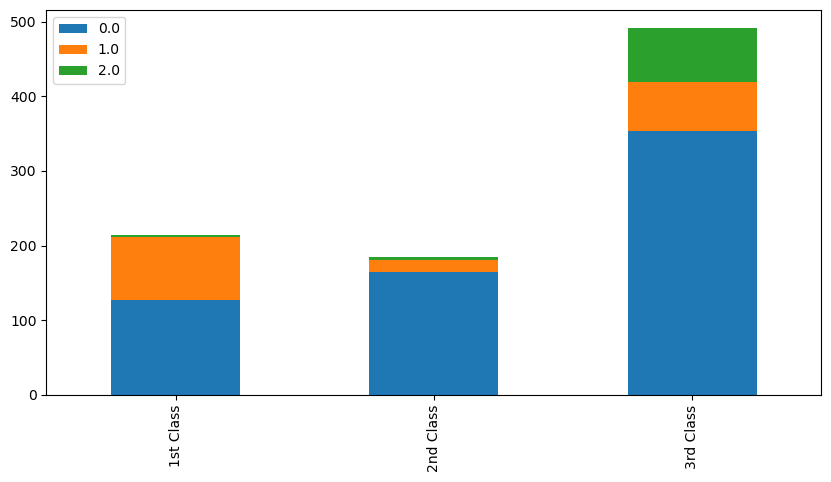

Pclass1:
 0.0    127
1.0     85
2.0      2
Name: Embarked, dtype: int64
Pclass2:
 0.0    164
1.0     17
2.0      3
Name: Embarked, dtype: int64
Pclass3:
 0.0    353
2.0     72
1.0     66
Name: Embarked, dtype: int64


In [78]:
Pclass1 = df[df['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass'] == 3]['Embarked'].value_counts()
new2 = pd.DataFrame([Pclass1,Pclass2,Pclass3])
new2.index = ['1st Class','2nd Class','3rd Class']
new2.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [79]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,22.0,A/5 21171,7.2500,2.0,0.0,0,2
1,1,1,1,38.0,PC 17599,71.2833,0.8,1.0,2,2
2,1,3,1,26.0,STON/O2. 3101282,7.9250,2.0,0.0,1,1
3,1,1,1,35.0,113803,53.1000,0.8,0.0,2,2
4,0,3,0,35.0,373450,8.0500,2.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,211536,13.0000,1.8,0.0,3,1
887,1,1,1,19.0,112053,30.0000,0.4,0.0,1,1
888,0,3,1,28.0,W./C. 6607,23.4500,2.0,0.0,1,2
889,1,1,0,26.0,111369,30.0000,0.8,1.0,0,1


In [80]:
df['Embarked']= df['Embarked'].fillna(0)

In [81]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,22.0,A/5 21171,7.2500,2.0,0.0,0,2
1,1,1,1,38.0,PC 17599,71.2833,0.8,1.0,2,2
2,1,3,1,26.0,STON/O2. 3101282,7.9250,2.0,0.0,1,1
3,1,1,1,35.0,113803,53.1000,0.8,0.0,2,2
4,0,3,0,35.0,373450,8.0500,2.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,211536,13.0000,1.8,0.0,3,1
887,1,1,1,19.0,112053,30.0000,0.4,0.0,1,1
888,0,3,1,28.0,W./C. 6607,23.4500,2.0,0.0,1,2
889,1,1,0,26.0,111369,30.0000,0.8,1.0,0,1


In [82]:
df=df.drop(['Ticket'],axis=1)

In [83]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,22.0,7.2500,2.0,0.0,0,2
1,1,1,1,38.0,71.2833,0.8,1.0,2,2
2,1,3,1,26.0,7.9250,2.0,0.0,1,1
3,1,1,1,35.0,53.1000,0.8,0.0,2,2
4,0,3,0,35.0,8.0500,2.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,1.8,0.0,3,1
887,1,1,1,19.0,30.0000,0.4,0.0,1,1
888,0,3,1,28.0,23.4500,2.0,0.0,1,2
889,1,1,0,26.0,30.0000,0.8,1.0,0,1


In [84]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [85]:
x.shape,y.shape

((891, 8), (891,))

In [86]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(891, 9)

In [87]:
threshold=3
print(np.where(z>3))

(array([ 23,  27,  88,  96,  96, 116, 118, 174, 185, 209, 258, 284, 299,
       311, 341, 377, 380, 438, 445, 475, 493, 527, 556, 557, 583, 599,
       630, 630, 647, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       806, 851, 867], dtype=int64), array([5, 4, 4, 3, 5, 3, 4, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 3, 4,
       5, 4, 5, 5, 3, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 5, 3, 5],
      dtype=int64))


In [88]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print('total_droped_rows',df.shape[0] - df_new.shape[0])

old dataframe (891, 9)
new dataframe (851, 9)
total_droped_rows 40


In [89]:
loss_percentage=(40/891)*100
loss_percentage

4.489337822671156

In [90]:
x=df_new.drop(['Survived'],axis=1)
y=df_new['Survived']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (680, 8)
Shape of x_test : (171, 8)
Shape of y_train : (680,)
Shape of y_test : (171,)


In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [94]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

83.04093567251462
[[103  10]
 [ 19  39]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       113
           1       0.80      0.67      0.73        58

    accuracy                           0.83       171
   macro avg       0.82      0.79      0.80       171
weighted avg       0.83      0.83      0.83       171



In [95]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

72.51461988304094
[[96 17]
 [30 28]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       113
           1       0.62      0.48      0.54        58

    accuracy                           0.73       171
   macro avg       0.69      0.67      0.67       171
weighted avg       0.71      0.73      0.72       171



In [96]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
print('accuracy_score:', accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 66.66666666666666
[[95 18]
 [39 19]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       113
           1       0.51      0.33      0.40        58

    accuracy                           0.67       171
   macro avg       0.61      0.58      0.58       171
weighted avg       0.64      0.67      0.64       171



In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score:', accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 83.04093567251462
[[99 14]
 [15 43]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       113
           1       0.75      0.74      0.75        58

    accuracy                           0.83       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.83      0.83      0.83       171



In [98]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 76.0233918128655
[[89 24]
 [17 41]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       113
           1       0.63      0.71      0.67        58

    accuracy                           0.76       171
   macro avg       0.74      0.75      0.74       171
weighted avg       0.77      0.76      0.76       171



In [99]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 83.62573099415205
[[103  10]
 [ 18  40]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       113
           1       0.80      0.69      0.74        58

    accuracy                           0.84       171
   macro avg       0.83      0.80      0.81       171
weighted avg       0.83      0.84      0.83       171



In [100]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 83.04093567251462
[[101  12]
 [ 17  41]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       113
           1       0.77      0.71      0.74        58

    accuracy                           0.83       171
   macro avg       0.81      0.80      0.81       171
weighted avg       0.83      0.83      0.83       171



In [101]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 83.62573099415205
[[103  10]
 [ 18  40]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       113
           1       0.80      0.69      0.74        58

    accuracy                           0.84       171
   macro avg       0.83      0.80      0.81       171
weighted avg       0.83      0.84      0.83       171



In [102]:
results = pd.DataFrame({
    'Model': ['LogisticRegression','KNN','SVC','Decision Tree' ,'GaussianNB','Random Forest','AdaBoostClassifier','GradientBoostingClassifier'],
    'Score': [83.04,71.92,66.66,83.04,76.02,83.62,83.04,83.62]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
83.62,Random Forest
83.62,GradientBoostingClassifier
83.04,LogisticRegression
83.04,Decision Tree
83.04,AdaBoostClassifier
76.02,GaussianNB
71.92,KNN
66.66,SVC


In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [104]:
clf = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], x , y, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",clf[i],":",round(np.mean(score)*100,2))

model_fit()

Score of Model LogisticRegression() : 81.55
Score of Model KNeighborsClassifier(n_neighbors=13) : 72.26
Score of Model DecisionTreeClassifier() : 78.26
Score of Model RandomForestClassifier(n_estimators=13) : 80.85
Score of Model GaussianNB() : 76.49
Score of Model SVC() : 67.92
Score of Model GradientBoostingClassifier(learning_rate=1, max_features=3, n_estimators=10,
                           random_state=10) : 81.2
Score of Model AdaBoostClassifier() : 81.19


In [105]:
lr=LogisticRegression()

In [106]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-2,2,100), "penalty":["l1","l2"]}

In [107]:
GSCV=GridSearchCV(lr,grid,cv=k_fold,scoring="accuracy", n_jobs= 4)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'C': 0.093260334688322, 'penalty': 'l2'}

In [108]:
GSCV_pred=GSCV.best_estimator_.predict(x_test)
print("best score:",accuracy_score(y_test,GSCV_pred)*100)

best score: 83.62573099415205


In [109]:
RFC=RandomForestClassifier()

In [110]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 140, num = 4)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 10, num = 2)]
max_depth.append(None)

min_samples_split = [ 5, 10]

min_samples_leaf = [ 2, 4]

bootstrap = [True, False]


grid = {"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "bootstrap": bootstrap,
              "n_estimators" :n_estimators,
              "criterion": ["gini"]}

In [111]:
GSRFC=GridSearchCV(RFC,grid,cv=k_fold,scoring="accuracy", n_jobs= 4)
GSRFC.fit(x_train,y_train)
GSRFC.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 140}

In [112]:
GSRFC_pred=GSRFC.best_estimator_.predict(x_test)
print("best score:",accuracy_score(y_test,GSRFC_pred)*100)

best score: 85.96491228070175


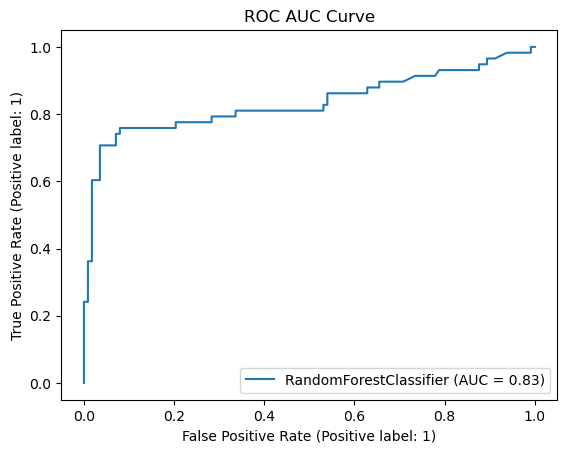

In [115]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GSRFC.best_estimator_,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()